## Tips for a successful submission
What are top reasons someone may not pass the practical exam? Here's our list of what to watch out for:

Familiarize yourself with the rubric and check that you’re addressing each item.
Read Acing the DataCamp Certification Practical Exam.
Make sure you’re meeting the data visualization criteria.
Be sure to address the specific questions and/or business problem in the instructions.
Leave plenty of time to submit your work.
(Professional only) Test the tools you’ll use to present before you start.
(Professional only) Tell the business what they need to consider for the future.
(Professional only) Make sure to address a non-technical audience in your presentation.


# Project Overview

## What
perform the analysis and write a short report.

Sales rep has a meeting with the executive team to update them on sales approaches for the new product line so I need this information as soon as possible.
We need to know:
- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, which method would you recommend we continue to use? Some
of these methods take more time from the team so they may not be the best for us to use if the results are similar.
We don’t really know if there are other differences between the customers in each group, so anything you can tell us would be really helpful to give some context to what went well.

## Who

Pens and Printers provides high quality office products to large organizations. We are a trusted provider of everything from pens and notebooks to desk chairs and monitors. We don’t produce our own products but sell those made by other companies.

We have built long lasting relationships with our customers and they trust us to provide them with the best products for them. As the way in which consumers buy products is changing, our sales tactics have to change too. Launching a new product line is expensive and we need to make sure we are using the best techniques to sell the new product effectively. The best approach may vary for each new product so we need to learn quickly what works and what doesn’t.

## Why

Six weeks ago we launched a new line of office stationery. Despite the world becoming increasingly digital, there is still demand for notebooks, pens and sticky notes.
Our focus has been on selling products to enable our customers to be more creative, focused on tools for brainstorming. We have tested three different sales strategies for this, targeted email and phone calls, as well as combining the two.

Email: Customers in this group received an email when the product line was launched, and a further email three weeks later. This required very little work for the team.

Call: Customers in this group were called by a member of the sales team. On average members of the team were on the phone for around thirty minutes per customer.

Email and call: Customers in this group were first sent the product information email, then called a week later by the sales team to talk about their needs and how this new product may support their work. The email required little work from the team, the call was around ten minutes per customer.

# Project

## Data Importing and Cleaning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

In [12]:
#df = pd.read_csv('original_data.csv')
df = pd.read_csv('https://github.com/SteffanLynch/Data_Portfolio/raw/master/Data_Sources/DC_Professional_Certification_Data.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [4]:
print(df.shape)
print()

print(df.dtypes)
print()
print(df.isna().sum())

(106, 787)

<!DOCTYPE html><html><head><meta name="google" content="notranslate"><meta http-equiv="X-UA-Compatible" content="IE=edge;"><style nonce="wyO2L0D8eItgE9fD4ainYw">@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:300;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmSU5fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:700;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmWUlfBBc9.ttf)format('truetype');}</style><meta name="referrer" content="origin"><titl

In [5]:
df['week'].unique()
df['customer_id'].value_counts().sort_values(ascending=False)
df[df['revenue'] == np.NaN]

#df['revenue'].value_counts()

KeyError: 'week'

In [ ]:
len_of_na = len(df[df['revenue'].isna() == True])
len_of_na

1074

In [ ]:
(len_of_na / len(df)) * 100

7.16

In [ ]:
missing = df['revenue'].isna() == True

incomplete = df[missing]
complete = df[~missing]

incomplete.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,1074.000000,1074.000000,0.0,1074.000000,1074.000000
mean,3.357542,10.662942,NaN,4.797020,25.559590
std,1.709222,1.994864,NaN,5.006776,3.574097
min,1.000000,7.000000,NaN,0.000000,15.000000
25%,2.000000,9.000000,NaN,1.000000,23.000000
50%,3.000000,10.000000,NaN,3.000000,25.000000
75%,5.000000,12.000000,NaN,7.000000,28.000000
max,6.000000,16.000000,NaN,39.000000,41.000000


In [ ]:
complete.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,13926.000000,13926.000000,13926.000000,13926.000000,13926.000000
mean,3.078271,10.040069,93.934943,4.978960,24.947006
std,1.650650,1.789690,47.435312,5.047828,3.491491
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,1.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,4.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,37.000000


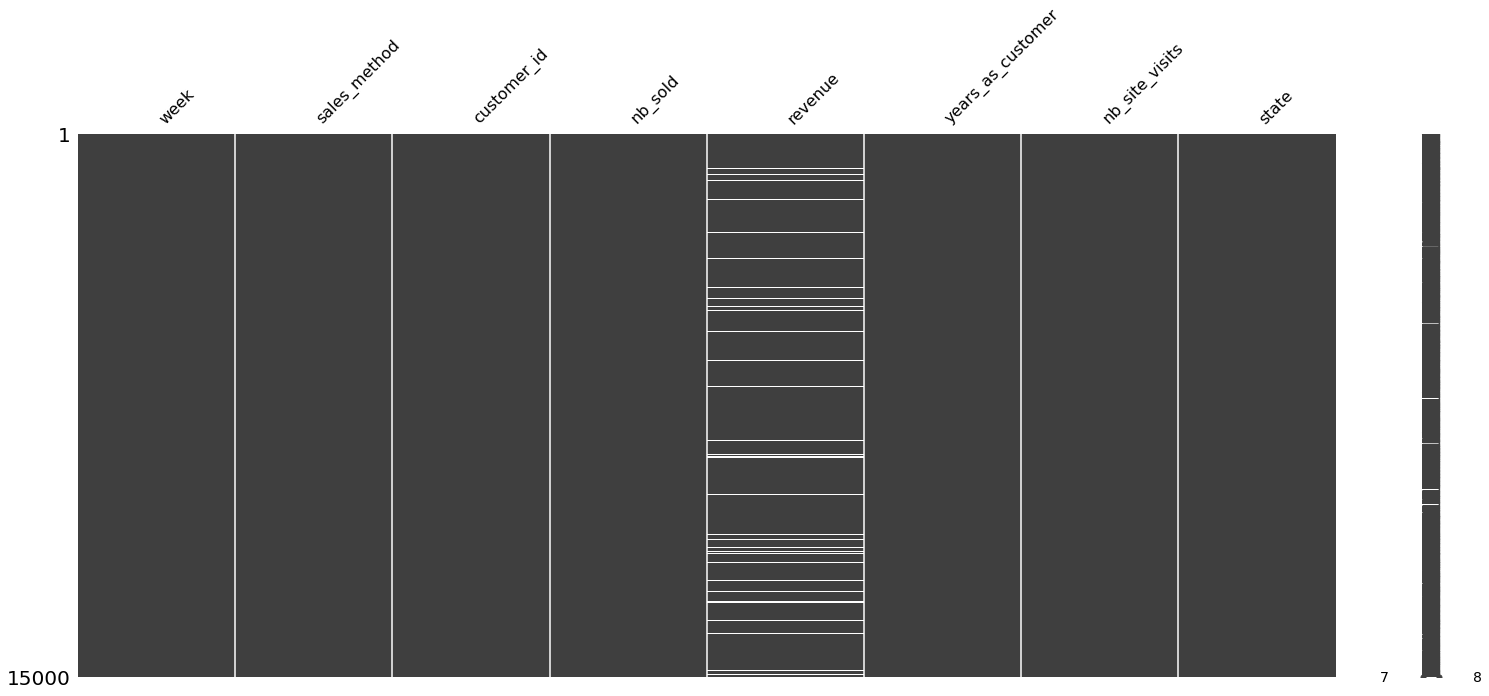

In [ ]:
msno.matrix(df.sort_values(by = 'years_as_customer', ascending = True))
plt.savefig('Missing_Data_Matrix.png', dpi = 300, bbox_inches = 'tight')


In [ ]:
df.groupby('sales_method').agg({'revenue': lambda x: x.isnull().sum()})

,revenue
sales_method,
Call,181
Email,541
Email + Call,346
em + call,3
email,3


In [ ]:
df.dropna(subset = ['revenue'], inplace = True)
df.shape

(13926, 8)

In [ ]:
#df['sales_method'].unique()
df['sales_method'] = df['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})
df['sales_method'].unique()
cat = pd.CategoricalDtype(df['sales_method'].unique(), ordered= False)

df['sales_method'] = df['sales_method'].astype(cat)

df['sales_method'].dtype

CategoricalDtype(categories=['Email + Call', 'Call', 'Email'], ordered=False)

In [ ]:
df['sales_method'].describe()

count     13926
unique        3
top       Email
freq       6922
Name: sales_method, dtype: object

In [ ]:
cattt = pd.CategoricalDtype(df['state'].unique(), ordered= False)

df['state'] = df['state'].astype(cattt)

df['state'].dtype

CategoricalDtype(categories=['Kansas', 'Wisconsin', 'Illinois', 'Mississippi', 'Georgia',
                  'Oklahoma', 'Massachusetts', 'Missouri', 'Texas', 'New York',
                  'Maryland', 'California', 'Tennessee', 'North Dakota',
                  'Florida', 'Michigan', 'North Carolina', 'Pennsylvania',
                  'Indiana', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
                  'Arkansas', 'Alaska', 'Oregon', 'New Hampshire', 'Ohio',
                  'New Jersey', 'Connecticut', 'Iowa', 'Montana', 'Washington',
                  'Arizona', 'Kentucky', 'Alabama', 'Nebraska',
                  'South Carolina', 'Minnesota', 'South Dakota', 'Maine',
                  'Utah', 'West Virginia', 'Vermont', 'New Mexico',
                  'Rhode Island', 'Nevada', 'Delaware', 'Idaho', 'Wyoming'],
, ordered=False)

In [ ]:
df['state'].describe()

count          13926
unique            50
top       California
freq            1739
Name: state, dtype: object

In [ ]:
df['customer_id'] = df['customer_id'].astype('category')

df['customer_id'].describe()

count                                    13926
unique                                   13926
top       00020b38-1ebb-427f-88d1-c60f3c426cfe
freq                                         1
Name: customer_id, dtype: object

In [ ]:
df[df.duplicated(subset= ['customer_id'], keep=False) == True]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


The dataset contains 15000 rows and 8 columns before cleaning and validataion. I have validated all the columns against the criteria in the dataset table:

- week: A range of 1 to 6 week period. The values were the same as the description. No cleaning is needed.
- sales_method: There should have only been three unique values for this column ('Email + Call, Email & Call). However there were 5. The other two were misspellings of the correct values so I replaced them with the correct values and then converted the column type from object to Pandas Catetgorical Data Type.
- customer_id: Object/string values without missing or duplicate data. The column was the same as the description. No cleaning is needed.
- nb_sold: Numerical data without missing values, same as the description. No cleaning is needed.
- revenue: Numerical data, but the only column within the entire dataset that contained any missing data. In total, there were 1074 records with missing data for revenue. This accounted for 7.16% of the entire datset. Given that there were no relationships between missing revenue values and any of the other observed (or unobserved) values, this missing data is classed as MCAR (Missing Completely at Random)
- years_as_customer: numerical data without missing values. The column data/values is the same as the description. No cleaning is needed.
- nb_site_visits: numerical data without missing values. The column data/values is the same as the description. No cleaning is needed.
- state: There are 50 possible unique values without missing values, same as the description. While no cleaning was necessary for this coloumn, I did however, connvert the column from an object tyoe to a Pandas Categorical Data Type for the sake of speed and memory.

After the data validation, the dataset contains 13926 rows and 8 columns without missing values.

## Exploratory Analysis

### Differences in Customer Groups

In [ ]:
cols = ['customer_id', 'nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits']
methods = df.groupby('sales_method')[cols].agg({cols[0]: 'count', cols[1]: 'sum', cols[2]: 'sum', \
            cols[3]:'mean', cols[4]: 'mean'})
methods['revenue_per_cust'] = methods['revenue'] / methods['customer_id']
methods['sold_per_cust'] = methods['nb_sold'] / methods['customer_id']
methods['revenue_per_sold'] = methods['revenue'] / methods['nb_sold']
methods.reset_index(inplace = True)
methods

,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,revenue_per_cust,sold_per_cust,revenue_per_sold
0,Email + Call,2223,27091,408256.69,4.526316,26.738641,183.651233,12.186685,15.069827
1,Call,4781,45424,227563.49,5.161472,24.422297,47.597467,9.500941,5.009763
2,Email,6922,67303,672317.83,4.998266,24.734036,97.127684,9.723057,9.989418


No handles with labels found to put in legend.


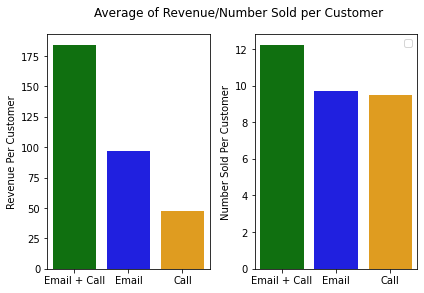

In [ ]:
fig, axes = plt.subplots(1, 2) #, sharey=True

method_order = ['Email + Call', 'Email', 'Call']
method_colours = {'Email + Call': 'green', 'Email': 'blue', 'Call': 'orange'}

sns.barplot(data = methods, x = 'sales_method', y = 'revenue_per_cust', ax = axes[0], \
    order = method_order, hue_order= method_order, palette= method_colours)
sns.barplot(data = methods, x = 'sales_method', y = 'sold_per_cust', ax = axes[1], \
    order = method_order, hue_order= method_order,  palette= method_colours)

fig.tight_layout()

axes[0].set_xlabel(None)
axes[0].set_ylabel('Revenue Per Customer')
axes[1].set_xlabel(None)
axes[1].set_ylabel('Number Sold Per Customer')
plt.title('Average of Revenue/Number Sold per Customer', x = -0.1, y = 1.05)
plt.savefig('Average_of_Revenue_and_Number_Sold_per_Customer.png', dpi = 300, bbox_inches = 'tight')
plt.legend()
plt.show()

Email and Call seems to be the most effective sales method of all three. While this sales method had the fewest number of ciustomers, they had by far the most revenue in total. This means that had the largest ratio of revenue to customer out of all the three methods.

The same is true for the number of site visits. While there was a narrower spread for the average number of site visits for each group, the email and call method, proves to still be most effective and yield the highest returns.

In [ ]:
df[(0 < df['years_as_customer']) & (df['years_as_customer'] < 40)]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
...,...,...,...,...,...,...,...,...
14993,1,Email,3ec54950-652e-4d8a-bc49-8b5c770c6cd2,8,83.98,2,21,Texas
14994,4,Email,56f02e26-3633-427d-8c4e-f45f00afa787,11,109.36,3,25,Ohio
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia


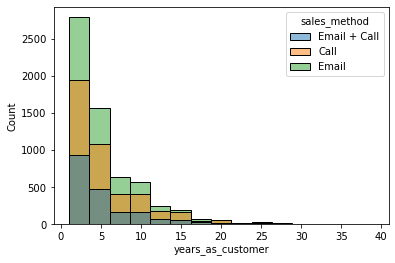

In [ ]:
sns.histplot(data = df[(0 < df['years_as_customer']) & (df['years_as_customer'] < 40)], \
    x = 'years_as_customer', hue= 'sales_method', bins= 15 )
plt.show()

In [ ]:
ranges = list(np.arange(0, 45, 5))
ranges.append(np.inf)
group_names = ['0-5 yrs', '6-10 yrs', '11-15 yrs', '16-20 yrs', '21-25 yrs', '26-30 yrs', '31-35 yrs', '36-40 yrs', '41+ yrs']

df['years_as_customer_grp'] = pd.cut(df['years_as_customer'], bins =ranges, labels = group_names)
df.loc[df['years_as_customer'] == 0, 'years_as_customer_grp'] = '0-5 yrs'
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,years_as_customer_grp
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas,0-5 yrs
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin,6-10 yrs
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois,0-5 yrs
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi,6-10 yrs
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia,6-10 yrs


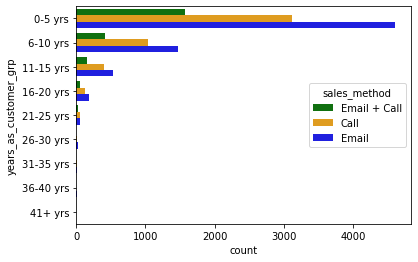

In [ ]:

group_names = ['0-5 yrs', '6-10 yrs', '11-15 yrs', '16-20 yrs', '21-25 yrs', '26-30 yrs', '31-35 yrs', '36-40 yrs', '41+ yrs']

df['years_as_customer_grp'] = pd.cut(df['years_as_customer'], bins =ranges, labels = group_names)
df.loc[df['years_as_customer'] == 0, 'years_as_customer_grp'] = '0-5 yrs'
sns.countplot(data = df, \
    y = 'years_as_customer_grp', hue= 'sales_method', palette=method_colours)
plt.show()

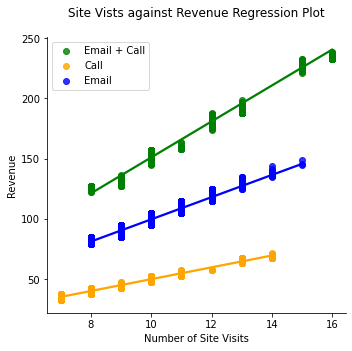

In [ ]:
sns.lmplot(data = df, x = 'nb_sold', y = 'revenue', hue = 'sales_method', palette=method_colours, legend=False)



plt.xlabel('Number of Site Visits')
plt.ylabel('Revenue')
plt.title('Site Vists against Revenue Regression Plot', x = 0.5, y = 1.05)
plt.savefig('Site_Vists_against_Revenue_Regression_Plot.png', dpi = 300, bbox_inches = 'tight')
plt.tight_layout()
plt.legend()
plt.show()

We can see that, although week, there are is positive correlation between number of site visits and revenue. As the number of the site visites increases, as does the revenue. 

However, from the graph, we can see that with the email and call group, there is a stronger relationshp. Email and call strengthens the corrleation so an there's a higher rate of increase for the revenue compared to the number of site visits.

In [ ]:
state = df.groupby('sales_method')['state'].apply(lambda groupp: groupp.value_counts().nlargest(4)).to_frame()
#state.unstack()
state

state
sales_method                  
Email + Call California    263
             Texas         191
             New York      137
             Florida       131
Call         California    621
             Texas         357
             New York      330
             Florida       287
Email        California    855
             Texas         561
             New York      432
             Florida       408

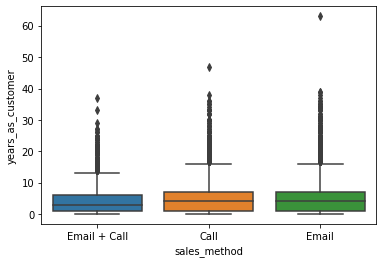

In [ ]:
sns.boxplot(data = df, x = 'sales_method', y = 'years_as_customer')
plt.show()

In [ ]:
state = df.groupby('state')['sales_method'].value_counts().to_frame()
state = state.reset_index().rename(columns= {'level_1': 'sales_method'})
state

,state,sales_method,sales_method
0,Kansas,Email,64
1,Kansas,Call,45
2,Kansas,Email + Call,20
3,Wisconsin,Email,122
4,Wisconsin,Call,75
...,...,...,...
145,Idaho,Call,15
146,Idaho,Email + Call,13
147,Wyoming,Email,14
148,Wyoming,Call,12


### How many customers were there for each approach?

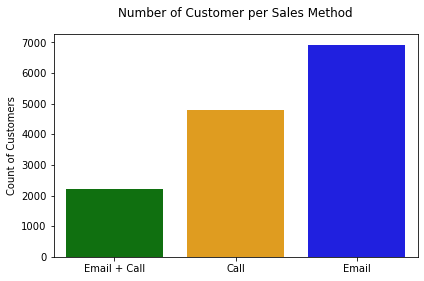

In [ ]:
sns.countplot(data = df, x = 'sales_method', palette=method_colours)
plt.ylabel('Count of Customers')
plt.xlabel(None)
plt.title('Number of Customer per Sales Method', y = 1.05)

plt.tight_layout()
plt.savefig('Number_of_Customer_per_Sales_Method.png', dpi = 300, bbox_inches = 'tight')
plt.show()

There was some disparity in the distribution of customers between the 3 sale method groups. The email group had the most with a total of 7466 customers. Second was those that received only call with 4962 customers. Those who received both email and call were of the minority with only 2572 customers, which is marginally higher than half of the number of call customers.

### What does the spread of the revenue look like overall? And for each method?

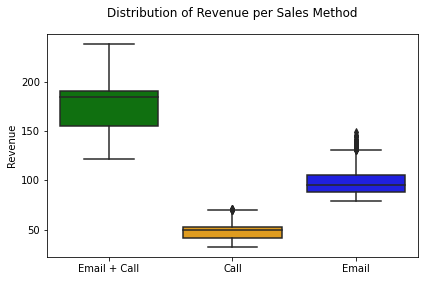

In [ ]:

sns.boxplot(data = df, x = 'sales_method', y = 'revenue', palette=method_colours)
plt.ylabel('Revenue')
plt.xlabel(None)
plt.title('Distribution of Revenue per Sales Method', y = 1.05)

plt.tight_layout()
plt.savefig('Distribution_of_Revenue_per_Sales_Method.png', dpi = 300, bbox_inches = 'tight')
plt.show()

Those who only received a call have the lowest spread of revenue (as depicted by the edges of the box). But they also have the lowest revenue amongst the three groups. In fact, the maximum revenue for a customer in the call method, is still lower than the minimum for any of the others.

The Email group yields a wider spread of revenue. However, it does have an even distribution of data, as shown by the median being in the middle of the box.

The Email and Call group have by far the widest spread of revenue but also the highest as well. The minimum generated revenue for a customer in the email and call group is just below the maxmium for the email group. It can be said though, that the revenue distribution for this group, is negatively skewed, as the median is closer to the upper quartile. This indicates that the data constitudes higher frequency of higher value revenues.

### Was there any difference in revenue over time for each of the methods?

The linegraph shows, there is a general upwards trend in revenue. There is a slight dip in the 3rd week. However, there is a an exponential rise in revenue from the 5th week into the 6th.

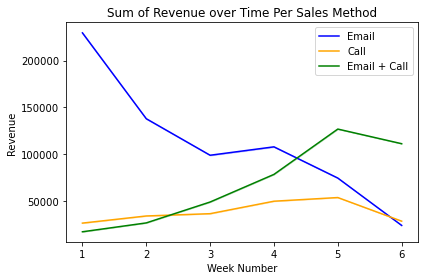

In [ ]:
fig, ax = plt.subplots()

sns.lineplot(data = df[df['sales_method'] == 'Email'], x = 'week', y = 'revenue', ax = ax, color=method_colours['Email'], label = 'Email', estimator = 'sum')
sns.lineplot(data = df[df['sales_method'] == 'Call'], x = 'week', y = 'revenue', ax = ax, color=method_colours['Call'], label = 'Call', estimator = 'sum')
sns.lineplot(data = df[df['sales_method'] == 'Email + Call'], x = 'week', y = 'revenue', ax = ax, color=method_colours['Email + Call'], label = 'Email + Call', estimator = 'sum')
#sns.lineplot(data = df, x = 'week', y = 'revenue', ax = ax, color= 'grey', label = 'All Data', linestyle = '--', estimator = 'sum')

plt.ylabel('Revenue')
plt.xlabel('Week Number')
plt.title('Sum of Revenue over Time Per Sales Method')
plt.legend()
plt.tight_layout()
plt.savefig('Sum_Revenue_over_Time_Per_Sales_Method.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
# fig, ax = plt.subplots()

# sns.lineplot(data = df[df['sales_method'] == 'Email'], x = 'week', y = 'customer_id', ax = ax, color=method_colours['Email'], label = 'Email', estimator = 'sum')
# sns.lineplot(data = df[df['sales_method'] == 'Call'], x = 'week', y = 'customer_id', ax = ax, color=method_colours['Call'], label = 'Call', estimator = 'sum')
# sns.lineplot(data = df[df['sales_method'] == 'Email + Call'], x = 'week', y = 'customer_id', ax = ax, color=method_colours['Email + Call'], label = 'Email + Call', estimator = 'sum')
# #sns.lineplot(data = df, x = 'week', y = 'revenue', ax = ax, color= 'grey', label = 'All Data', linestyle = '--', estimator = 'sum')

# plt.ylabel('Revenue')
# plt.xlabel('Week Number')
# plt.title('Sum of Revenue over Time Per Sales Method')
# plt.legend()
# plt.tight_layout()
# plt.savefig('Sum_Revenue_over_Time_Per_Sales_Method.png', dpi = 300, bbox_inches = 'tight')
# plt.show()

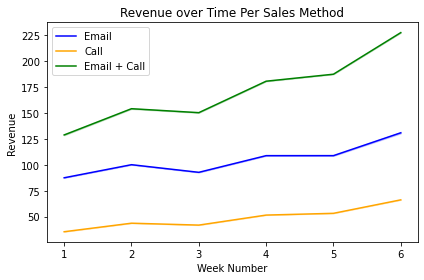

In [ ]:
fig, ax = plt.subplots()

sns.lineplot(data = df[df['sales_method'] == 'Email'], x = 'week', y = 'revenue', ax = ax, color=method_colours['Email'], label = 'Email')
sns.lineplot(data = df[df['sales_method'] == 'Call'], x = 'week', y = 'revenue', ax = ax, color=method_colours['Call'], label = 'Call')
sns.lineplot(data = df[df['sales_method'] == 'Email + Call'], x = 'week', y = 'revenue', ax = ax, color=method_colours['Email + Call'], label = 'Email + Call')
#sns.lineplot(data = df, x = 'week', y = 'revenue', ax = ax, color= 'grey', label = 'All Data', linestyle = '--', estimator = 'sum')

plt.ylabel('Revenue')
plt.xlabel('Week Number')
plt.title('Revenue over Time Per Sales Method')
plt.legend()
plt.tight_layout()
plt.savefig('Average_Revenue_over_Time_Per_Sales_Method.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
df.groupby(['week'])['revenue'].sum().to_frame().reset_index().groupby('week')['revenue'].cumsum()
  #.groupby(level=0).cumsum().reset_index()

0    272810.06
1    198059.82
2    183776.55
3    235678.56
4    254701.28
5    163111.74
Name: revenue, dtype: float64

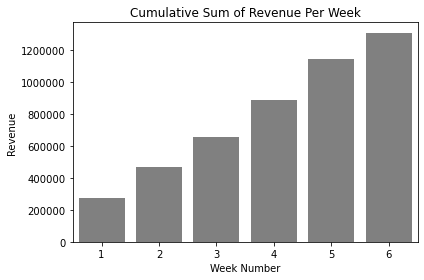

In [ ]:
cumsum = df.groupby('week').sum()
cumsum['rev_cumsum'] = cumsum['revenue'].cumsum()
cumsum['customers'] = df.groupby('week')['customer_id'].count()

sns.barplot(data = cumsum, x = cumsum.index, y = 'rev_cumsum', color= 'grey')
plt.ticklabel_format(style='plain', axis='y')

plt.ylabel('Revenue')
plt.xlabel('Week Number')
plt.title('Cumulative Sum of Revenue Per Week')
plt.tight_layout()
plt.savefig('CumSum_of_Revenue_Per_Week.png', dpi = 300, bbox_inches = 'tight')
plt.show()


In [ ]:
cumsum

,nb_sold,revenue,years_as_customer,nb_site_visits,rev_cumsum,customers
week,,,,,,
1,29298,272810.06,19402,80800,272810.06,3497
2,22402,198059.82,11540,57413,470869.88,2323
3,20294,183776.55,11822,53818,654646.43,2257
4,25863,235678.56,11246,62020,890324.99,2387
5,26624,254701.28,11011,62473,1145026.27,2366
6,15337,163111.74,4316,30888,1308138.01,1096


No handles with labels found to put in legend.


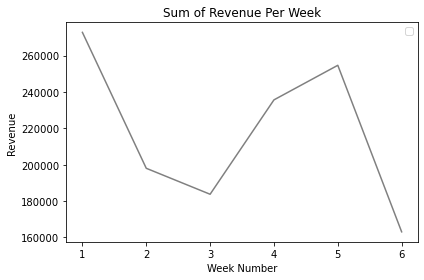

In [ ]:
sns.lineplot(data = cumsum, x = cumsum.index, y = 'revenue', color= 'grey')
plt.ticklabel_format(style='plain', axis='y')

plt.ylabel('Revenue')
plt.xlabel('Week Number')
plt.title('Sum of Revenue Per Week')
plt.legend()
plt.tight_layout()
plt.savefig('Sum_of_Revenue_Per_Week.png', dpi = 300, bbox_inches = 'tight')
plt.show()

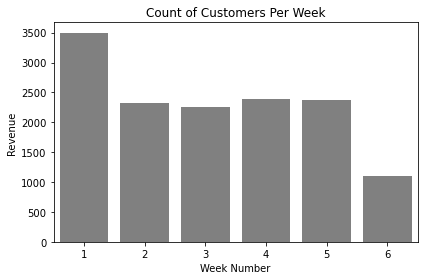

In [ ]:
sns.barplot(data = cumsum, x = cumsum.index, y = 'customers', color= 'grey')
plt.ticklabel_format(style='plain', axis='y')

plt.ylabel('Revenue')
plt.xlabel('Week Number')
plt.title('Count of Customers Per Week')
plt.tight_layout()
plt.savefig('Count_of_Customers_Per_Week.png', dpi = 300, bbox_inches = 'tight')
plt.show()


When we seperate the trend in revenue between the different sales method, we can see that the email and call group consistently yields the highest revenue while calls consistenly yield the least.

For the call groip and email group, the gradient for revenue is quite flat whereas the gradient for the email and call group is prominently steeper.
 

### Which method would you recommend we continue to use?

In [ ]:
df['revenue'].sum() / df['customer_id'].count()

93.93494255349705

In [ ]:
df[df['sales_method'] == 'Email + Call']['revenue'].sum() / df[df['sales_method'] == 'Email + Call']['customer_id'].count()

183.651232568601

## Business Metrics

The key business metric should be revenue per customer. As the aim of is to discover the most effective sales strategy, its a collary that sales is an important metric. But the revenuew can be dependent on many factors, one of the biggest being the number of customers a given method was used on. As this varies widely throughout the six-week period, it gives a false/narrative of revenue. To standardise this, the best business method is an average of revenue generated per customer.

At the end of the six week period, considering all sales methods combined, the average revenue per customer $93.93. But for the email and call method seperately, the revenue per customer is $183.66!!

The Email and Call method generated just over 31% of the total revenue, despite only being use with 15% of the customers!

In [ ]:
total_revenue = df['revenue'].sum()
e_c_revenue = df.loc[df['sales_method'] == 'Email + Call', 'revenue'].sum()

(e_c_revenue / total_revenue) *100

31.208992237753264

In [ ]:
total_revenue = df['customer_id'].count()
e_c_revenue = df.loc[df['sales_method'] == 'Email + Call', 'customer_id'].count()

(e_c_revenue / total_revenue) *100

15.962947005601032

## Recommendations

For the following weeks, I would recommend Pens & Printers use the email and calls method when trying to generate leads for thei new product line.

- Measure and monitor whether the length of the email or the length of the phone calls further have an impact on the generated revenue from that customer.
- Only use email and call in combination with each other, as its proven that in combination they are twice as effective than either by themself.

Given that there was a greater return when both email and call were used at the same time, indicates that customers are more receptive and likely to buy when they feel that the comoany genuinely care about them and make them feel valued, as well as buidling a relationship with them.

As an extention of that, Pens and Printers could also research into email marketing campaigns and sequences, as well as offering them discounts, for example, as a gift for being a custome to strengthen the brand - customer relationship.

For a deeper analysis, they could also include more detailed data. For example, they could collect the specific time and date of a customer order to investigate any seasonality or peak sale times.

If possible, they should also include more demographic data to explore if there's any other factors to do with the customer themselves, that influence the revenue or sales, as opposed to just purely the marketing/sales method. For example, does a certain age group tend buy more? Are married couples with children more likely to buy than single adults without a family?

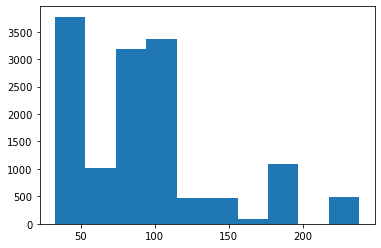

In [ ]:
plt.hist(df['revenue'])
plt.show()

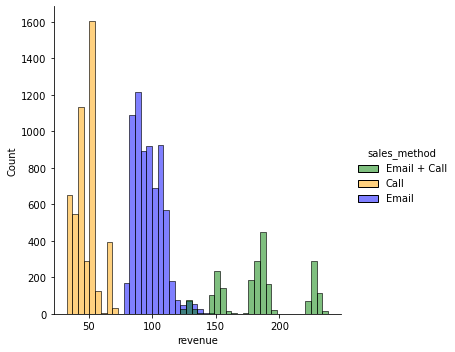

In [ ]:
sns.displot(kind = 'hist', data = df, x= 'revenue', hue = 'sales_method', palette = method_colours)
plt.show()